# Coding Challenge 1

1. **Load stock price data** for Genaral Electric (GE) and another ticker symbol of your choice from 2015-01-02 until 2020-12-31.  
Go to https://finance.yahoo.com and get the right ticker symbol. For instruments traded outside the US, you have to add a country/exchange suffix.  
Check the suffix list here https://help.yahoo.com/kb/SLN2310.html  
As an example, the symbol for National Indian Stock Exchenge is .NS, ticker symbol for Reliance is RELIANCE.NS
2. **Select Close prices** only and create a price chart for GE.
3. **Normalize the stock prices** for GE and the ticker symbol of your choice (Base Value: 1) and visualize! What's the final normalized price on 2020-12-30?

In [17]:
import pandas as pd
# import Yahoo finance API
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [18]:
# set start and end date for time series
start = "2015-01-02"
end = "2020-12-31"

In [19]:
# set ticker symbols of financial instruments
# Genaral Electric = GE
# can be searcherd at https://finance.yahoo.com/
symbol = ["GE", "RELIANCE.NS"]

In [20]:
df = yf.download(symbol, start, end)
df

[*********************100%***********************]  2 of 2 completed


Adj Close                Close                 High              \
                  GE RELIANCE.NS       GE RELIANCE.NS       GE RELIANCE.NS   
Date                                                                         
2015-01-02  167.7533    418.1377 192.7692    438.6173 195.8462    443.8181   
2015-01-05  164.6741    413.5576 189.2308    433.8129 192.3846    441.2672   
2015-01-06  161.1262    394.7885 185.1538    414.1245 189.0000    432.4013   
2015-01-07  161.1931    403.3822 185.2308    423.1391 187.6154    425.3680   
2015-01-08  163.1344    397.5979 187.4615    417.0716 187.5385    427.3987   
...              ...         ...      ...         ...      ...         ...   
2020-12-23   86.5290   1937.6168  86.8800   1943.8500  87.8400   1951.4500   
2020-12-24   84.8558   1987.7556  85.2000   1994.1500  86.8000   1998.8000   
2020-12-28   84.7761   1996.8762  85.1200   2003.3000  86.2400   2018.0000   
2020-12-29   84.1387   1983.6687  84.4800   1990.0500  86.1600   2012.3000   
2020-12-30   85.3338   1989.1012  85.6800   1995.5000  86.8000   2007.2000   

                Low                 Open                   Volume  \
                 GE RELIANCE.NS       GE RELIANCE.NS           GE   
Date                                                                
2015-01-02 191.3077    437.9982 194.9231    439.8804 5319704.0000   
2015-01-05 188.6154    432.9461 192.3846    438.3449 5464316.0000   
2015-01-06 184.0769    412.0938 188.1538    430.9153 8288800.0000   
2015-01-07 184.4615    414.5703 186.2308    414.6198 5673525.0000   
2015-01-08 185.6154    416.1305 187.0769    426.0118 5619172.0000   
...             ...         ...      ...         ...          ...   
2020-12-23  84.9600   1920.6500  85.4400   1930.0000 7563063.0000   
2020-12-24  84.9600   1945.9000  86.8000   1947.0000 3756213.0000   
2020-12-28  84.6400   1995.3000  85.6000   2006.7000 6724588.0000   
2020-12-29  84.3200   1982.5500  85.2800   2009.0000 6629488.0000   
2020-12-30  84.4000   1975.5500  84.6400   1995.2500 6327625.0000   

                          
             RELIANCE.NS  
Date                      
2015-01-02  3383424.0000  
2015-01-05  4662967.0000  
2015-01-06  8596809.0000  
2015-01-07  9562421.0000  
2015-01-08  9171029.0000  
...                  ...  
2020-12-23  8999898.0000  
2020-12-24  9588577.0000  
2020-12-28  7947719.0000  
2020-12-29  8589407.0000  
2020-12-30 10173132.0000  

[1552 rows x 12 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1552 entries, 2015-01-02 to 2020-12-30
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, GE)           1510 non-null   float64
 1   (Adj Close, RELIANCE.NS)  1478 non-null   float64
 2   (Close, GE)               1510 non-null   float64
 3   (Close, RELIANCE.NS)      1478 non-null   float64
 4   (High, GE)                1510 non-null   float64
 5   (High, RELIANCE.NS)       1478 non-null   float64
 6   (Low, GE)                 1510 non-null   float64
 7   (Low, RELIANCE.NS)        1478 non-null   float64
 8   (Open, GE)                1510 non-null   float64
 9   (Open, RELIANCE.NS)       1478 non-null   float64
 10  (Volume, GE)              1510 non-null   float64
 11  (Volume, RELIANCE.NS)     1478 non-null   float64
dtypes: float64(12)
memory usage: 157.6 KB


In [22]:
# select data element in the outer index level
# for further analysis we're only intersted in the close price
# select daily close prices only and create a separate data frame
close = df.Close.copy()
close

,GE,RELIANCE.NS
Date,,
2015-01-02,192.7692,438.6173
2015-01-05,189.2308,433.8129
2015-01-06,185.1538,414.1245
2015-01-07,185.2308,423.1391
2015-01-08,187.4615,417.0716
...,...,...
2020-12-23,86.8800,1943.8500
2020-12-24,85.2000,1994.1500
2020-12-28,85.1200,2003.3000


In [23]:
# get summary statistics
close.describe()

,GE,RELIANCE.NS
count,1510.0000,1478.0000
mean,147.0980,962.8736
std,70.1788,490.6637
min,43.9200,401.5685
25%,80.8000,503.0503
50%,135.8077,907.5226
75%,220.1539,1266.3711
max,253.3077,2324.5500


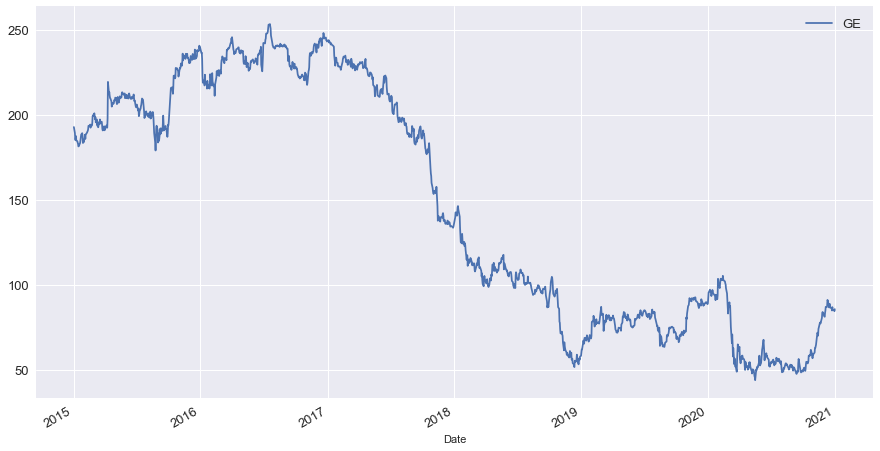

In [24]:
# create price chart for singule instrument
# dropna() drops missing values
# create chart with plot method
close.GE.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

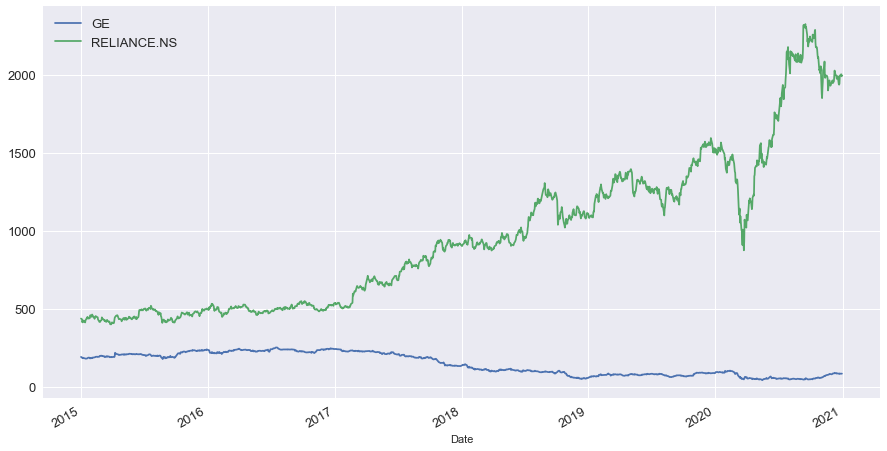

In [25]:
# create price chart for both instruments in one single chart
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [26]:
# normalizing for one instrument 
close.iloc[0,0] # first price of GE

192.76922607421875

In [28]:
# divide all prices of GE by the very first price
# which creates a base value of 1
close.GE.div(close.iloc[0,0])

Date
2015-01-02   1.0000
2015-01-05   0.9816
2015-01-06   0.9605
2015-01-07   0.9609
2015-01-08   0.9725
              ...  
2020-12-23   0.4507
2020-12-24   0.4420
2020-12-28   0.4416
2020-12-29   0.4382
2020-12-30   0.4445
Name: GE, Length: 1552, dtype: float64

In [29]:
close.iloc[0] # first price all tickers

GE            192.7692
RELIANCE.NS   438.6173
Name: 2015-01-02 00:00:00, dtype: float64

In [32]:
# normalize all tickers
norm = close.div(close.iloc[0])
norm

,GE,RELIANCE.NS
Date,,
2015-01-02,1.0000,1.0000
2015-01-05,0.9816,0.9890
2015-01-06,0.9605,0.9442
2015-01-07,0.9609,0.9647
2015-01-08,0.9725,0.9509
...,...,...
2020-12-23,0.4507,4.4318
2020-12-24,0.4420,4.5464
2020-12-28,0.4416,4.5673


In [37]:
# final normalized price on 2020-12-30
norm.loc["2020-12-30"]

GE            0.4445
RELIANCE.NS   4.5495
Name: 2020-12-30 00:00:00, dtype: float64

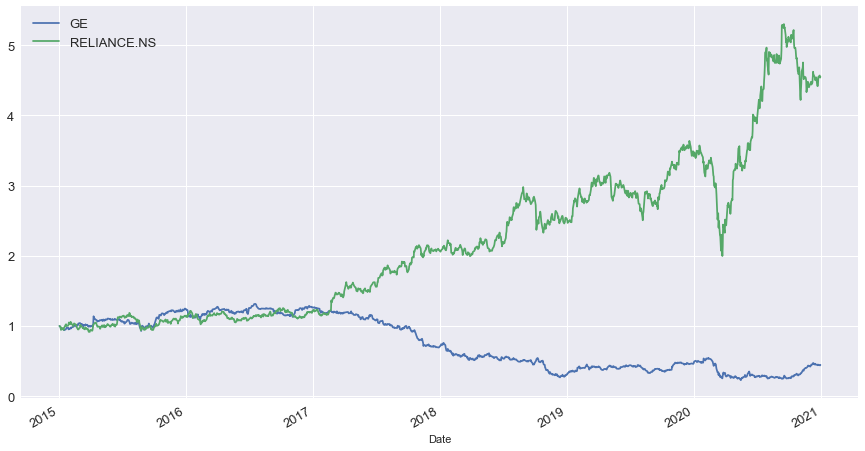

In [33]:
# visualizing the normalized data
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = False)
plt.legend(fontsize = 13)
plt.show()

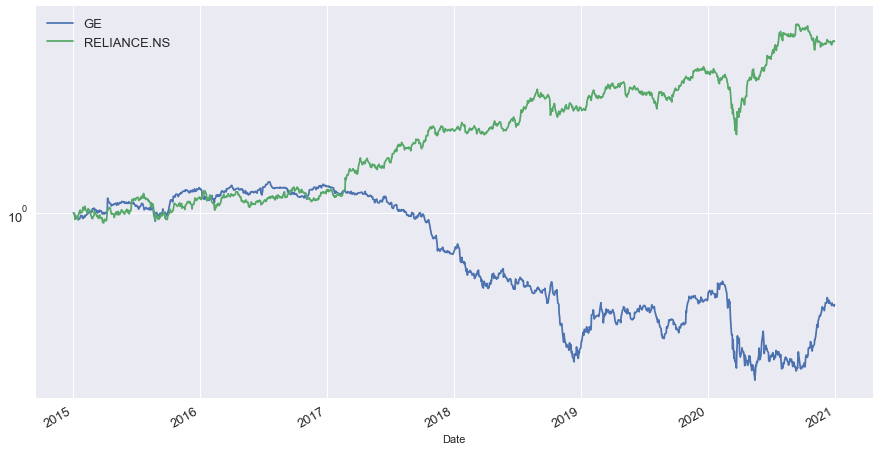

In [34]:
# changing the scale of the y-axis to logarithmic scale with logy = True
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = True)
plt.legend(fontsize = 13)
plt.show()